In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

le = preprocessing.LabelEncoder()

In [2]:
#loading the train and test dataset
train_df = pd.read_csv("KDDTrain+.txt")
#train_df

test_df = pd.read_csv("KDDTest+.txt")
#test_df

In [3]:
df = pd.concat([train_df,test_df])
#df.to_csv("test.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,severity_score
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
#Drop severity score column
df = df.drop(['severity_score'], axis = 1)

#assigning the numerical values to class  

new_df=df['class']

                                 
frame=new_df.replace({ 'normal' : 0, 'apache2': 1,'back':1, 'land': 1, 'neptune': 1, 
                                         'mailbomb': 1, 'pod': 1, 'processtable': 1, 'smurf': 1, 
                                         'teardrop': 1,'udpstorm': 1, 'worm': 1,'ipsweep' : 2,
                                         'mscan' : 2, 'nmap' : 2, 'portsweep' : 2,'satan' : 2,
                                         'saint' : 2, 'ftp_write': 3,'guess_passwd': 3,'imap': 3,
                                         'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3, 'warezmaster': 3,
                            'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3, 'xlock': 3,
                            'xsnoop': 3,'httptunnel': 3,'buffer_overflow': 4,'loadmodule': 4,'perl': 4,
                            'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

frame



0        0
1        0
2        1
3        0
4        0
        ..
22539    0
22540    0
22541    1
22542    0
22543    2
Name: class, Length: 148517, dtype: int64

In [5]:
df['class'] = frame
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [6]:
#converting the categorical values into numerical values - protocol_type, service and flag 

df.protocol_type = le.fit_transform(df.protocol_type)
df.service = le.fit_transform(df.service)
df.flag = le.fit_transform(df.flag)

df.protocol_type = df.protocol_type.astype('category')
df.service = df.service.astype('category')
df.flag = df.flag.astype('category')

df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,148517.000000,148517.0,148517.0,148517.0,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
unique,NaN,3.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1.0,24.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,121569.0,48191.0,89820.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,276.779305,NaN,NaN,NaN,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,0.630615
std,2460.683131,NaN,NaN,NaN,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,0.767383
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,NaN,NaN,NaN,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,1.000000


In [7]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
22540,0,1,24,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
22541,0,1,24,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
22542,0,2,12,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [8]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [9]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
22540,0,1,24,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
22541,0,1,24,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
22542,0,2,12,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
22539    0
22540    0
22541    1
22542    0
22543    2
Name: class, Length: 148517, dtype: int64

In [11]:
#Spliting the KDDTrain+ csv file itself into train and test data


from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) # 80% training and 20% test

In [12]:
print('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (103961, 41) (103961,)
Test set: (44556, 41) (44556,)


In [13]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
7628,0,1,24,9,306,246,0,0,0,0,...,9,255,1.00,0.00,0.11,0.01,0.00,0.00,0.0,0.0
57620,0,1,24,9,203,707,0,0,0,0,...,8,247,1.00,0.00,0.12,0.02,0.00,0.00,0.0,0.0
31798,0,1,24,9,231,3357,0,0,0,0,...,203,255,1.00,0.00,0.00,0.02,0.00,0.00,0.0,0.0
21399,0,1,54,5,0,0,0,0,0,0,...,255,23,0.09,0.62,0.01,0.00,0.00,0.04,0.0,0.0
63539,6,1,60,9,176,3846,0,0,0,0,...,214,22,0.10,0.02,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,1,66,5,0,0,0,0,0,0,...,255,19,0.07,0.04,0.00,0.00,1.00,1.00,0.0,0.0
97639,0,1,24,9,296,313,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
95939,0,1,20,5,0,0,0,0,0,0,...,255,5,0.02,0.07,0.00,0.00,1.00,1.00,0.0,0.0
117952,0,1,24,9,293,5017,0,0,0,0,...,20,255,1.00,0.00,0.05,0.07,0.00,0.00,0.0,0.0


In [14]:
X_training=X[:125973]
#X_training
X_testing = X[125973:]
#X_testing
Y_training = Y[:125973]
#Y_training
Y_testing = Y[125973:]
#Y_testing


In [15]:
print('Train set:', X_training.shape,  Y_training.shape)
print ('Test set:', X_testing.shape,  Y_testing.shape)

Train set: (125973, 41) (125973,)
Test set: (22544, 41) (22544,)


## Variance threshold

In [16]:
### It will remove zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_training)

VarianceThreshold(threshold=0)

In [17]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [18]:
### Finding non constant features
sum(var_thres.get_support())

40

In [19]:
constant_columns = [column for column in X_training.columns
                    if column not in X_training.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [20]:
for feature in constant_columns:
     print(feature)

num_outbound_cmds


In [21]:
X_training_vth=X_training.drop(constant_columns,axis=1)
X_training_vth

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,2,49,9,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,1,54,9,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,1,30,5,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [22]:
X_testing_vth=X_testing.drop(constant_columns,axis=1)
X_testing_vth

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,49,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,1,49,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,1,20,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,0,14,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,1,60,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,1,24,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,1,24,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,2,12,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


## Decision tree after variance threshold

In [23]:
from sklearn import tree
from sklearn import metrics

## Pearson correlation


In [24]:
X_training_vth.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,-0.012249,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,-0.401084,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,-0.010928,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219


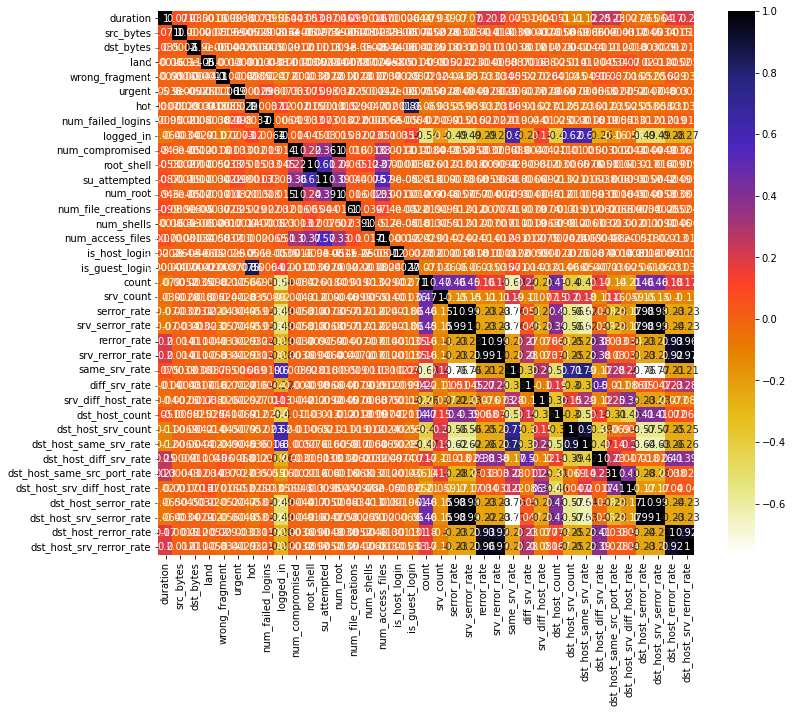

In [25]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_training_vth.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [26]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # if we are interested in absolute coeff value, can use abs() function
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(X_training_vth, 0.85)
len(set(corr_features))

9

In [28]:
corr_features

{'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'is_guest_login',
 'num_root',
 'srv_rerror_rate',
 'srv_serror_rate'}

In [29]:
X_training_pcor=X_training.drop(corr_features,axis=1)
X_testing_pcor=X_testing.drop(corr_features,axis=1)

In [30]:
X_training_pcor

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,20,9,491,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00
1,0,2,44,9,146,0,0,0,0,0,...,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00
2,0,1,49,5,0,0,0,0,0,0,...,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04
4,0,1,24,9,199,420,0,0,0,0,...,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,1.0,0.0,0.14,0.06,0.00,255,25,0.06,0.00,0.00
125969,8,2,49,9,105,145,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,255,244,0.01,0.01,0.00
125970,0,1,54,9,2231,384,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,255,30,0.06,0.00,0.00
125971,0,1,30,5,0,0,0,0,0,0,...,1.0,0.0,0.06,0.05,0.00,255,8,0.05,0.00,0.00


In [31]:
X_testing_pcor

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,49,1,0,0,0,0,0,0,...,0.0,1.0,0.04,0.06,0.00,255,10,0.06,0.00,0.00
1,0,1,49,1,0,0,0,0,0,0,...,0.0,1.0,0.01,0.06,0.00,255,1,0.06,0.00,0.00
2,2,1,20,9,12983,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,134,86,0.04,0.61,0.02
3,0,0,14,9,20,0,0,0,0,0,...,0.0,0.0,1.00,0.00,1.00,3,57,0.00,1.00,0.28
4,1,1,60,2,0,15,0,0,0,0,...,0.0,1.0,1.00,0.00,0.75,29,86,0.17,0.03,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,100,141,0.06,0.01,0.01
22540,0,1,24,9,317,938,0,0,0,0,...,0.0,0.0,1.00,0.00,0.18,197,255,0.00,0.01,0.01
22541,0,1,24,9,54540,8314,0,0,0,2,...,0.0,0.0,1.00,0.00,0.20,255,255,0.00,0.00,0.00
22542,0,2,12,9,42,42,0,0,0,0,...,0.0,0.0,1.00,0.00,0.33,255,252,0.01,0.00,0.00


In [59]:
clf_Tree_pcor = tree.DecisionTreeClassifier()

In [60]:
clf_Tree_pcor.fit(X_training_pcor,Y_training)

DecisionTreeClassifier()

In [61]:
Y_pred_Tree_pcor=clf_Tree_pcor.predict(X_testing_pcor)

In [62]:
df_tree_pcor = pd.DataFrame({'Actual': Y_testing, 'Predicted': Y_pred_Tree_pcor})

In [63]:
#df_tree_pcor.head(30)

In [64]:
metrics.mean_absolute_error(Y_testing,Y_pred_Tree_pcor)

0.4594127040454223

In [65]:
metrics.accuracy_score(Y_testing,Y_pred_Tree_pcor)

0.7672551454932577

In [66]:
metrics.precision_recall_fscore_support(Y_testing,Y_pred_Tree_pcor, average='weighted')

(0.8101972803076883, 0.7672551454932577, 0.736284559189439, None)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
#clf_random = RandomForestClassifier(max_depth=20, random_state=0)
clf_random_pcor = RandomForestClassifier(max_depth = 25,random_state=0)

In [42]:
clf_random_pcor.fit(X_training_pcor,Y_training)

RandomForestClassifier(max_depth=25, random_state=0)

In [43]:
Y_pred_random_pcor=clf_random_pcor.predict(X_testing_pcor)

In [44]:
random_df = pd.DataFrame({'Actual': Y_testing, 'Predicted': Y_pred_random_pcor})

In [45]:
#random_df

In [46]:
metrics.mean_absolute_error(Y_testing,Y_pred_random_pcor)

0.5586408800567778

In [47]:
metrics.accuracy_score(Y_testing,Y_pred_random_pcor)

0.7409510290986515

In [48]:
metrics.precision_recall_fscore_support(Y_testing,Y_pred_random_pcor, average='weighted')

(0.8036858240203499, 0.7409510290986515, 0.6935252618310759, None)

In [49]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_training_pcor,Y_training)



GaussianNB()

In [50]:
# making predictions on the testing set
Y_pred_gaussian_pcor = gnb.predict(X_testing_pcor)
 
# comparing actual response values (Y_test_df) with predicted response values (y_pred)
#from sklearn import metrics
#metrics.accuracy_score(Y_testing,Y_pred_random_pcor)

In [51]:
metrics.accuracy_score(Y_testing,Y_pred_random_pcor)

0.7409510290986515

In [163]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4,shuffle=False)

In [164]:
kf.split(X)

<generator object _BaseKFold.split at 0x000001E7B14649E0>

In [165]:
print("Train: ", "TEST:")
for train_index, test_index in kf.split(X):
     print(train_index, test_index)

Train:  TEST:
[ 37130  37131  37132 ... 148514 148515 148516] [    0     1     2 ... 37127 37128 37129]
[     0      1      2 ... 148514 148515 148516] [37130 37131 37132 ... 74256 74257 74258]
[     0      1      2 ... 148514 148515 148516] [ 74259  74260  74261 ... 111385 111386 111387]
[     0      1      2 ... 111385 111386 111387] [111388 111389 111390 ... 148514 148515 148516]


In [167]:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []

# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    # Train the model
    model = clf_Tree_pcor.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)# Print the accuracy    
print(accuracy_model)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([125973, 125974, 125975, 125976, 125977,\n            ...\n            148512, 148513, 148514, 148515, 148516],\n           dtype='int64', length=22544). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"